In [251]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [252]:
housing  = pd.read_csv('train.csv')

In [253]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [254]:
housing.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


## Step 1 : Data Cleaning

#### There are a lot of columns with NULL values <br> To handle them we need to divide them into 2 categories <br> 1. Where the number of NULL values is very high - We will simply drop these columns. <br> 2. Where the number of NULL values is relatively low - we will try to impute these values using mean, median or mode OR we will drop the records having NULL values in these columns

In [255]:
housing['LotFrontage'].describe()

count    1201.000000
mean       70.049958
std        24.284752
min        21.000000
25%        59.000000
50%        69.000000
75%        80.000000
max       313.000000
Name: LotFrontage, dtype: float64

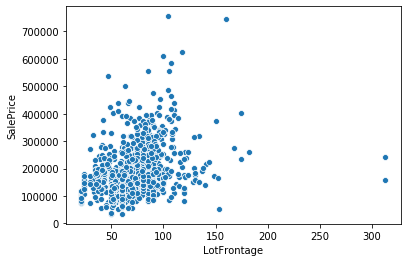

In [256]:
sns.scatterplot(housing.LotFrontage , housing.SalePrice)

In [257]:
## We decide to drop this column for now
housing = housing.drop(columns=['LotFrontage'])

In [258]:
housing.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotArea', 'Street', 'Alley',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'WoodDeckSF'

In [259]:
## There are many columns with very high NULL values - Lets drop these columns
housing = housing.drop(columns=['Alley' , 'FireplaceQu' , 'PoolQC' , 'Fence' , 'MiscFeature'])

In [260]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 75 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   LotShape       1460 non-null   object 
 6   LandContour    1460 non-null   object 
 7   Utilities      1460 non-null   object 
 8   LotConfig      1460 non-null   object 
 9   LandSlope      1460 non-null   object 
 10  Neighborhood   1460 non-null   object 
 11  Condition1     1460 non-null   object 
 12  Condition2     1460 non-null   object 
 13  BldgType       1460 non-null   object 
 14  HouseStyle     1460 non-null   object 
 15  OverallQual    1460 non-null   int64  
 16  OverallCond    1460 non-null   int64  
 17  YearBuilt      1460 non-null   int64  
 18  YearRemo

In [261]:
## Removing all the predictors related to basement - as we think they are not very important 
## and add unnecessary complexity to the model and also because they have some NULL values
housing = housing.drop(columns=[c for c in housing.columns if c[:4] == 'Bsmt'])

In [262]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 65 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   LotShape       1460 non-null   object 
 6   LandContour    1460 non-null   object 
 7   Utilities      1460 non-null   object 
 8   LotConfig      1460 non-null   object 
 9   LandSlope      1460 non-null   object 
 10  Neighborhood   1460 non-null   object 
 11  Condition1     1460 non-null   object 
 12  Condition2     1460 non-null   object 
 13  BldgType       1460 non-null   object 
 14  HouseStyle     1460 non-null   object 
 15  OverallQual    1460 non-null   int64  
 16  OverallCond    1460 non-null   int64  
 17  YearBuilt      1460 non-null   int64  
 18  YearRemo

In [263]:
### Removing all the predictors related to Garage as we think they are not very significant 
### and add unnecessary complexity to the model and also because they have many NULL values
housing = housing.drop(columns=[c for c in housing.columns if c[:6] == 'Garage'])

In [264]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 58 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   LotShape       1460 non-null   object 
 6   LandContour    1460 non-null   object 
 7   Utilities      1460 non-null   object 
 8   LotConfig      1460 non-null   object 
 9   LandSlope      1460 non-null   object 
 10  Neighborhood   1460 non-null   object 
 11  Condition1     1460 non-null   object 
 12  Condition2     1460 non-null   object 
 13  BldgType       1460 non-null   object 
 14  HouseStyle     1460 non-null   object 
 15  OverallQual    1460 non-null   int64  
 16  OverallCond    1460 non-null   int64  
 17  YearBuilt      1460 non-null   int64  
 18  YearRemo

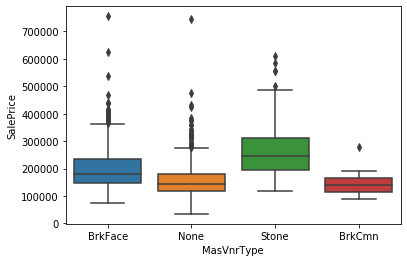

In [265]:
sns.boxplot(x = 'MasVnrType' , y = 'SalePrice' , data=housing)

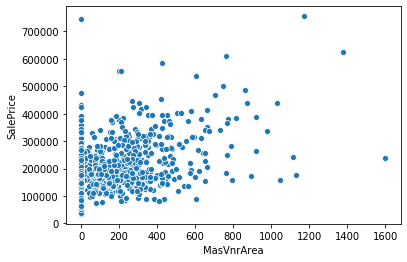

In [266]:
sns.scatterplot(housing.MasVnrArea , housing.SalePrice)

In [267]:
## Removing records which have NULL values for Masonry Veneer
housing = housing[~(housing.MasVnrArea.isnull())]

In [268]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1452 entries, 0 to 1459
Data columns (total 58 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1452 non-null   int64  
 1   MSSubClass     1452 non-null   int64  
 2   MSZoning       1452 non-null   object 
 3   LotArea        1452 non-null   int64  
 4   Street         1452 non-null   object 
 5   LotShape       1452 non-null   object 
 6   LandContour    1452 non-null   object 
 7   Utilities      1452 non-null   object 
 8   LotConfig      1452 non-null   object 
 9   LandSlope      1452 non-null   object 
 10  Neighborhood   1452 non-null   object 
 11  Condition1     1452 non-null   object 
 12  Condition2     1452 non-null   object 
 13  BldgType       1452 non-null   object 
 14  HouseStyle     1452 non-null   object 
 15  OverallQual    1452 non-null   int64  
 16  OverallCond    1452 non-null   int64  
 17  YearBuilt      1452 non-null   int64  
 18  YearRemo

In [269]:
housing.Electrical.value_counts()

SBrkr    1326
FuseA      94
FuseF      27
FuseP       3
Mix         1
Name: Electrical, dtype: int64

In [270]:
## Removing the record which has NULL value for Electrical
housing = housing[~(housing.Electrical.isnull())]

In [271]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1451 entries, 0 to 1459
Data columns (total 58 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1451 non-null   int64  
 1   MSSubClass     1451 non-null   int64  
 2   MSZoning       1451 non-null   object 
 3   LotArea        1451 non-null   int64  
 4   Street         1451 non-null   object 
 5   LotShape       1451 non-null   object 
 6   LandContour    1451 non-null   object 
 7   Utilities      1451 non-null   object 
 8   LotConfig      1451 non-null   object 
 9   LandSlope      1451 non-null   object 
 10  Neighborhood   1451 non-null   object 
 11  Condition1     1451 non-null   object 
 12  Condition2     1451 non-null   object 
 13  BldgType       1451 non-null   object 
 14  HouseStyle     1451 non-null   object 
 15  OverallQual    1451 non-null   int64  
 16  OverallCond    1451 non-null   int64  
 17  YearBuilt      1451 non-null   int64  
 18  YearRemo

### Now we have 1451 records which have Non-null values for all the potential predictor variables

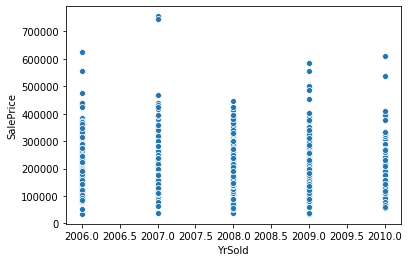

In [272]:
sns.scatterplot(housing.YrSold , housing.SalePrice)

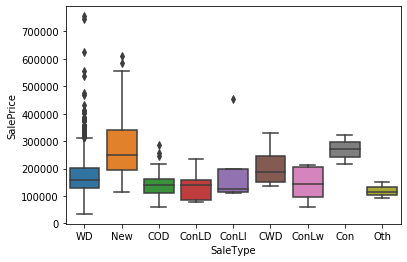

In [273]:
sns.boxplot(housing.SaleType , housing.SalePrice)

In [274]:
### Removing some more features 
housing = housing.drop(columns=['MoSold' , 'YrSold' , 'SaleType'])

In [275]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1451 entries, 0 to 1459
Data columns (total 55 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1451 non-null   int64  
 1   MSSubClass     1451 non-null   int64  
 2   MSZoning       1451 non-null   object 
 3   LotArea        1451 non-null   int64  
 4   Street         1451 non-null   object 
 5   LotShape       1451 non-null   object 
 6   LandContour    1451 non-null   object 
 7   Utilities      1451 non-null   object 
 8   LotConfig      1451 non-null   object 
 9   LandSlope      1451 non-null   object 
 10  Neighborhood   1451 non-null   object 
 11  Condition1     1451 non-null   object 
 12  Condition2     1451 non-null   object 
 13  BldgType       1451 non-null   object 
 14  HouseStyle     1451 non-null   object 
 15  OverallQual    1451 non-null   int64  
 16  OverallCond    1451 non-null   int64  
 17  YearBuilt      1451 non-null   int64  
 18  YearRemo

In [276]:
### Drop the Id column
housing = housing.drop(columns=['Id'])

In [277]:
housing.YearBuilt.value_counts()

2006    64
2005    64
2004    54
2007    47
2003    44
        ..
1906     1
1911     1
1913     1
1917     1
1872     1
Name: YearBuilt, Length: 112, dtype: int64

In [278]:
### Dropping Year built and year remodelled
housing = housing.drop(columns=['YearBuilt' , 'YearRemodAdd'])

In [279]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1451 entries, 0 to 1459
Data columns (total 52 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1451 non-null   int64  
 1   MSZoning       1451 non-null   object 
 2   LotArea        1451 non-null   int64  
 3   Street         1451 non-null   object 
 4   LotShape       1451 non-null   object 
 5   LandContour    1451 non-null   object 
 6   Utilities      1451 non-null   object 
 7   LotConfig      1451 non-null   object 
 8   LandSlope      1451 non-null   object 
 9   Neighborhood   1451 non-null   object 
 10  Condition1     1451 non-null   object 
 11  Condition2     1451 non-null   object 
 12  BldgType       1451 non-null   object 
 13  HouseStyle     1451 non-null   object 
 14  OverallQual    1451 non-null   int64  
 15  OverallCond    1451 non-null   int64  
 16  RoofStyle      1451 non-null   object 
 17  RoofMatl       1451 non-null   object 
 18  Exterior

In [280]:
## Changing the datatype of MSSubClass
housing['MSSubClass'] = housing['MSSubClass'].astype(object)

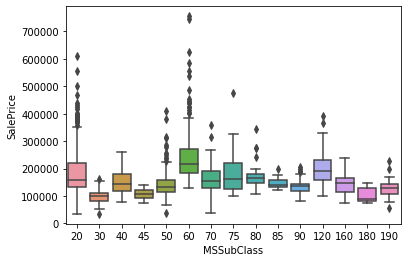

In [281]:
sns.boxplot(housing.MSSubClass , housing.SalePrice)

## Step 2 : Visualizing the Data (only selected variables)

### Analysis of Numeric variables

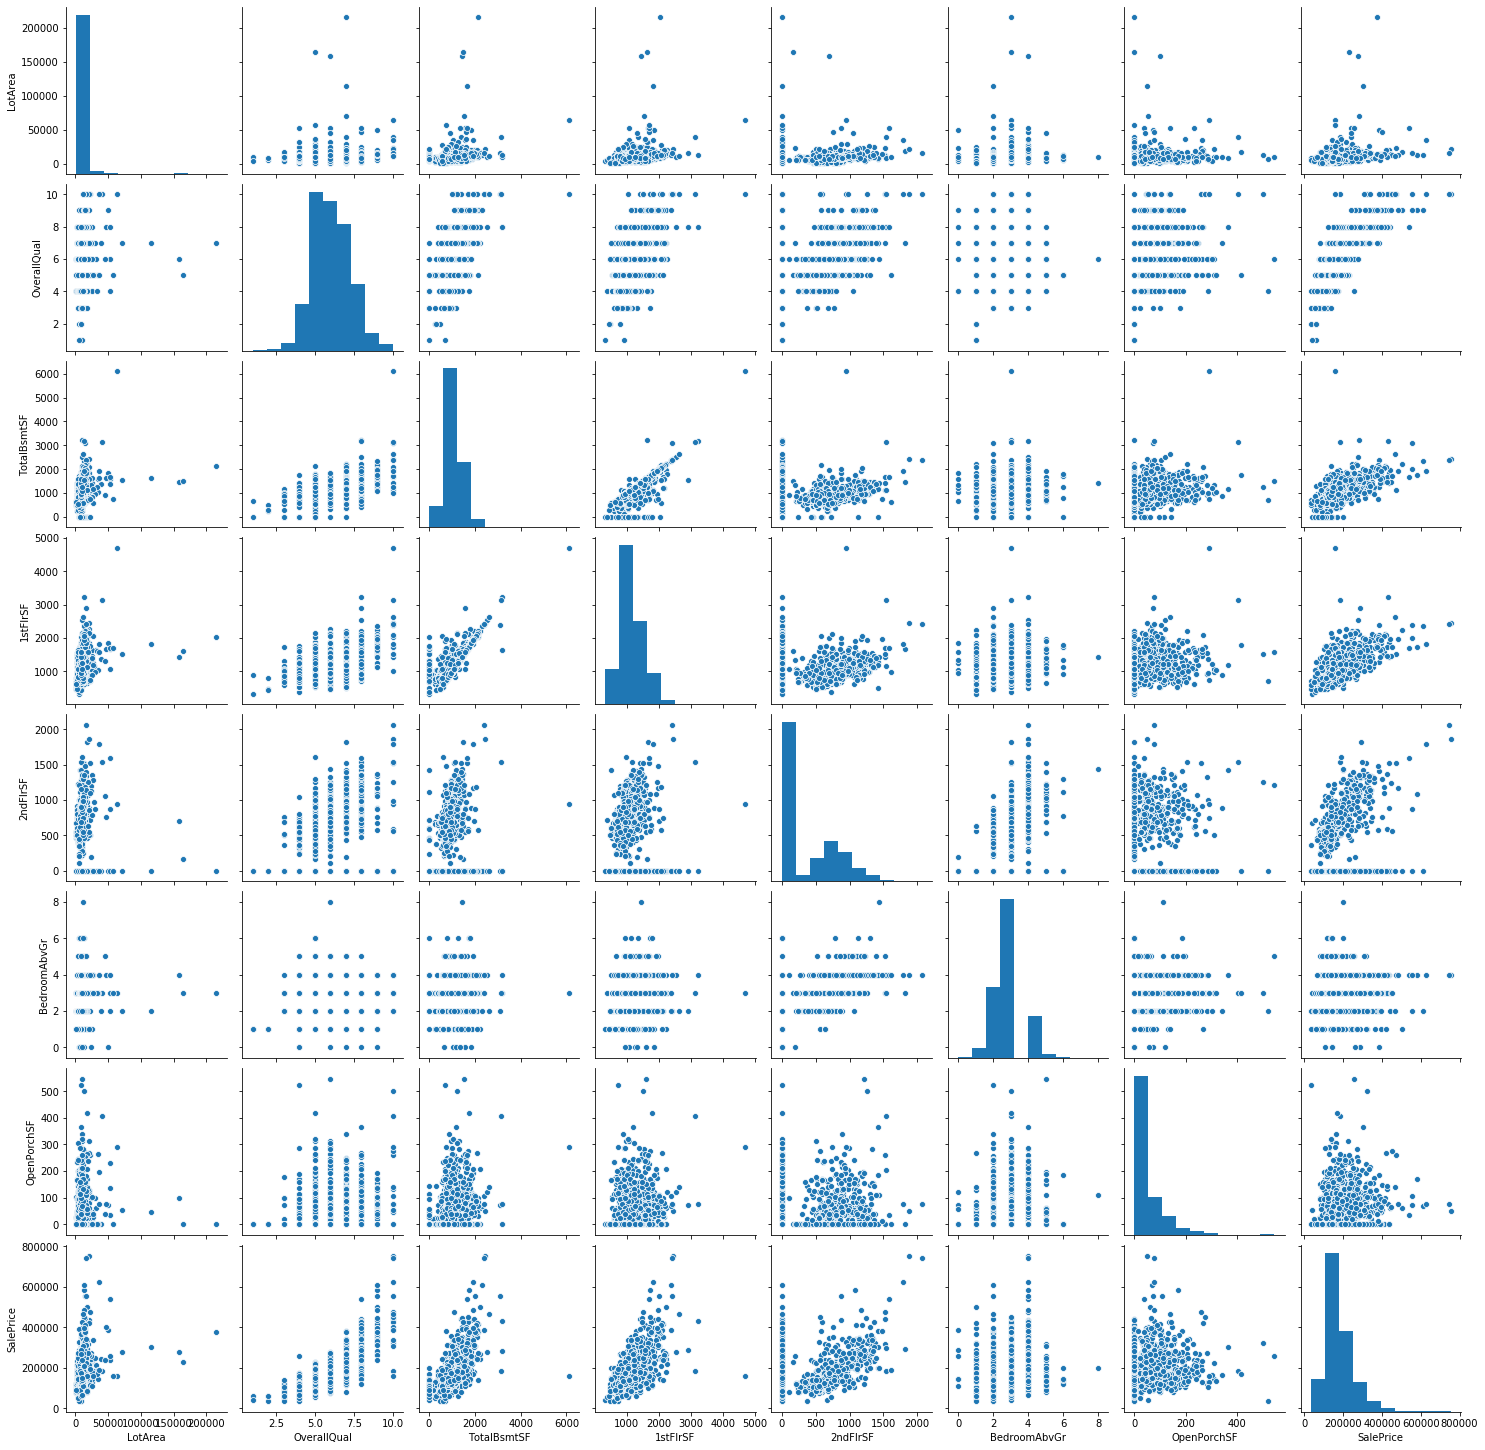

In [282]:
sns.pairplot(housing[['LotArea' , 'OverallQual' , 'TotalBsmtSF' , '1stFlrSF' , '2ndFlrSF' , 'BedroomAbvGr' , 'OpenPorchSF' ,'SalePrice']])

Observations :
- Overall Quality has significant impact on the house prices
- Total Bsmnt Area , 1st Floor SF , 2nd Floor SF have a decent linear relationship with Sale Price

### Analysis of Categorical Variables

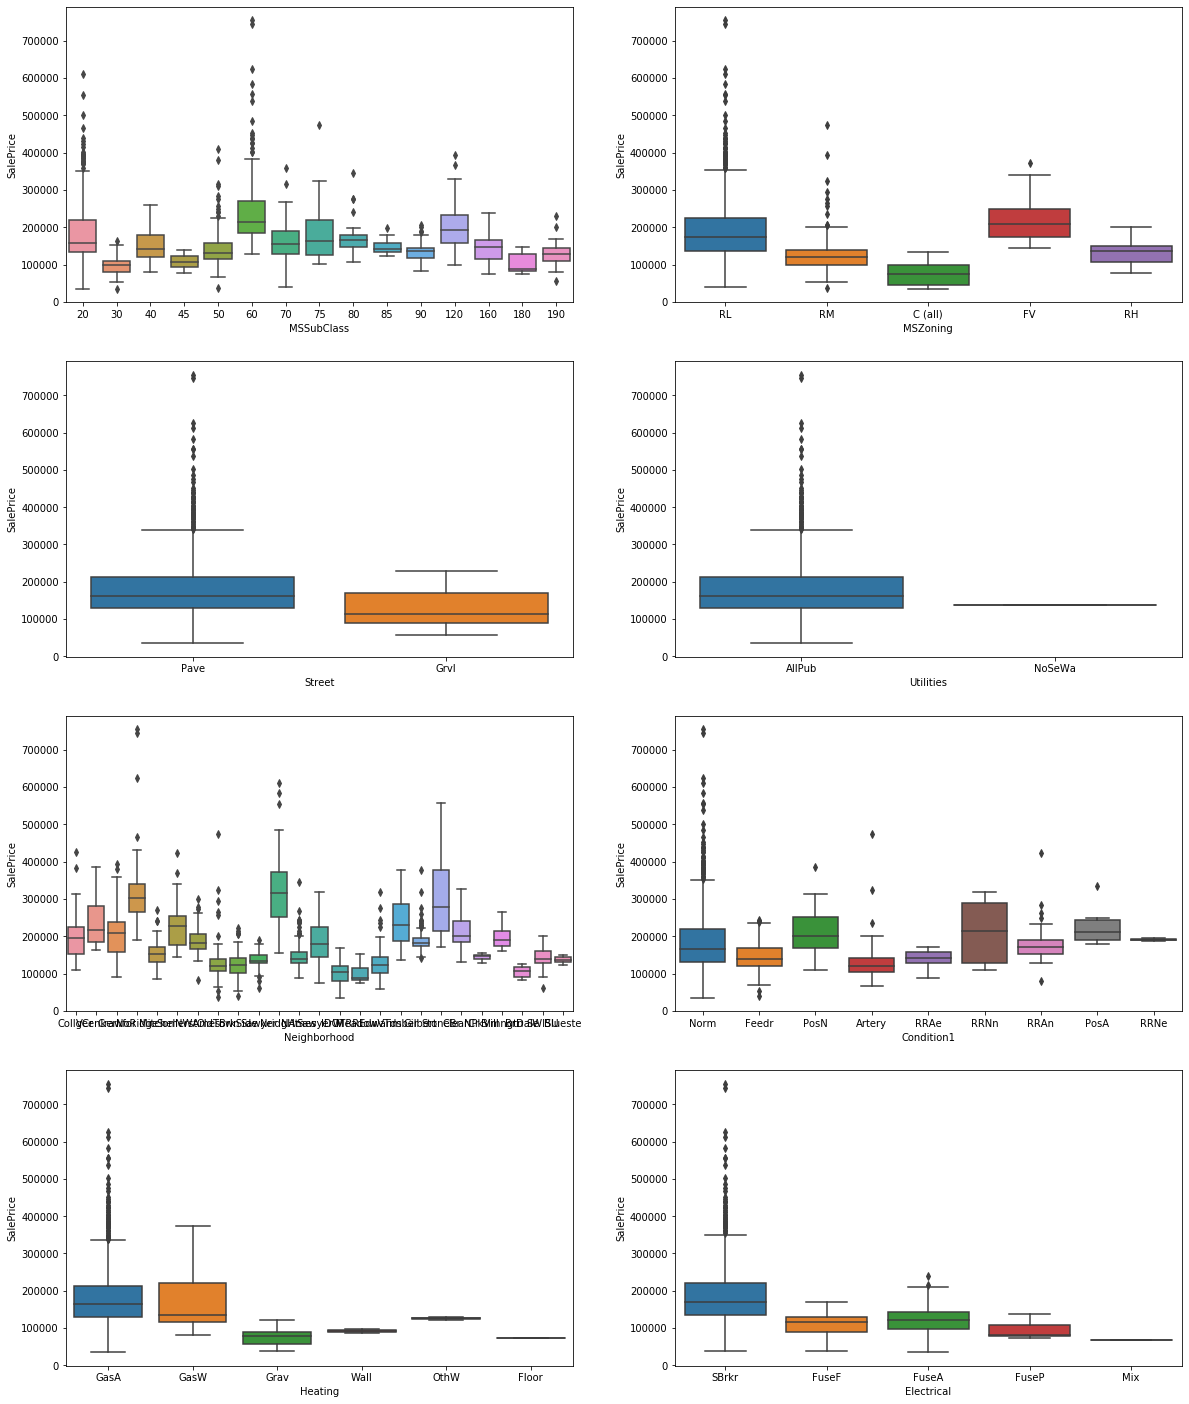

In [283]:
plt.figure(figsize=(20, 25))
plt.subplot(4,2,1)
sns.boxplot(x = 'MSSubClass', y = 'SalePrice', data = housing)
plt.subplot(4,2,2)
sns.boxplot(x = 'MSZoning', y = 'SalePrice', data = housing)
plt.subplot(4,2,3)
sns.boxplot(x = 'Street', y = 'SalePrice', data = housing)
plt.subplot(4,2,4)
sns.boxplot(x = 'Utilities', y = 'SalePrice', data = housing)
plt.subplot(4,2,5)
sns.boxplot(x = 'Neighborhood', y = 'SalePrice', data = housing)
plt.subplot(4,2,6)
sns.boxplot(x = 'Condition1', y = 'SalePrice', data = housing)
plt.subplot(4,2,7)
sns.boxplot(x = 'Heating', y = 'SalePrice', data = housing)
plt.subplot(4,2,8)
sns.boxplot(x = 'Electrical', y = 'SalePrice', data = housing)


Observations :
- Houses with Elctrical system = SBrkr have a higher value than the rest
- Houses with MSZoning = Fv have a higher value than the rest

### Checking correlation between different numeric features

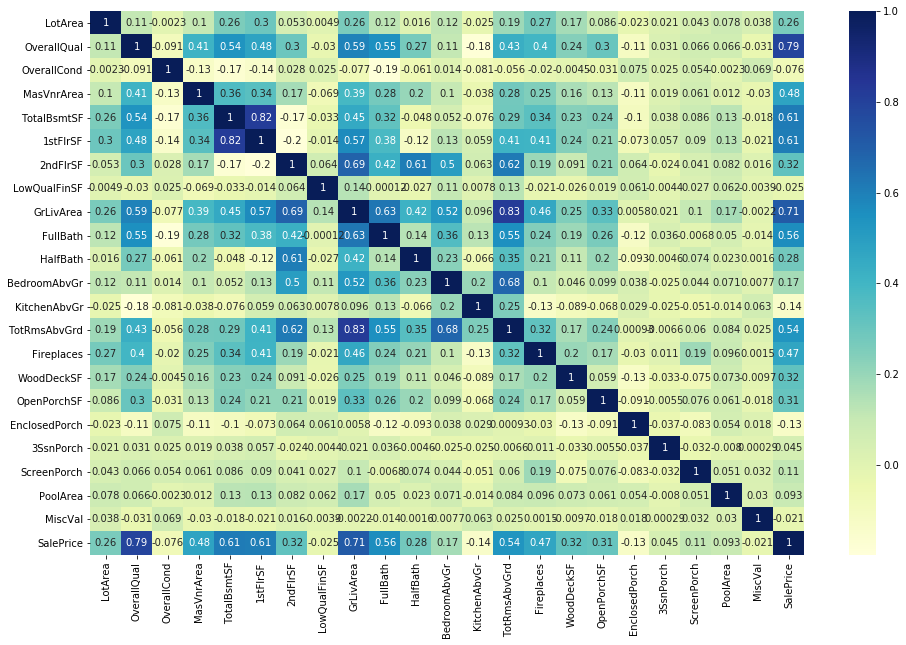

In [284]:
## Check the correlation of various input features
plt.figure(figsize = (16, 10))
sns.heatmap(housing.corr(), annot = True, cmap="YlGnBu")
plt.show()

Observations :
- Fist flr SF and TotalBsmtSf have high correlation
- Total rooms above ground and Ground Liv area have high correlation

## Step 3 : Data Preparation

### Splitting the housing dataframe into X and Y

In [285]:
y = housing.pop('SalePrice')

In [286]:
y.head()

0    208500
1    181500
2    223500
3    140000
4    250000
Name: SalePrice, dtype: int64

In [287]:
X = housing

In [288]:
X.head()

,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,SaleCondition
0,60,RL,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,856,GasA,Ex,Y,SBrkr,856,854,0,1710,2,1,3,1,Gd,8,Typ,0,Y,0,61,0,0,0,0,0,Normal
1,20,RL,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,2,0,3,1,TA,6,Typ,1,Y,298,0,0,0,0,0,0,Normal
2,60,RL,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,920,GasA,Ex,Y,SBrkr,920,866,0,1786,2,1,3,1,Gd,6,Typ,1,Y,0,42,0,0,0,0,0,Normal
3,70,RL,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,3,1,Gd,7,Typ,1,Y,0,35,272,0,0,0,0,Abnorml
4,60,RL,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,2,1,4,1,Gd,9,Typ,1,Y,192,84,0,0,0,0,0,Normal


### Creating dummy variables for Categorical variables

In [289]:
housing_categorical = X.select_dtypes(include=['object'])

In [290]:
housing_categorical

,MSSubClass,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,PavedDrive,SaleCondition
0,60,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,GasA,Ex,Y,SBrkr,Gd,Typ,Y,Normal
1,20,RL,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,Gable,CompShg,MetalSd,MetalSd,None,TA,TA,CBlock,GasA,Ex,Y,SBrkr,TA,Typ,Y,Normal
2,60,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,GasA,Ex,Y,SBrkr,Gd,Typ,Y,Normal
3,70,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,Gable,CompShg,Wd Sdng,Wd Shng,None,TA,TA,BrkTil,GasA,Gd,Y,SBrkr,Gd,Typ,Y,Abnorml
4,60,RL,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,GasA,Ex,Y,SBrkr,Gd,Typ,Y,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,None,TA,TA,PConc,GasA,Ex,Y,SBrkr,TA,Typ,Y,Normal
1456,20,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,Gable,CompShg,Plywood,Plywood,Stone,TA,TA,CBlock,GasA,TA,Y,SBrkr,TA,Min1,Y,Normal
1457,70,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,2Story,Gable,CompShg,CemntBd,CmentBd,None,Ex,Gd,Stone,GasA,Ex,Y,SBrkr,Gd,Typ,Y,Normal
1458,20,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,Hip,CompShg,MetalSd,MetalSd,None,TA,TA,CBlock,GasA,Gd,Y,FuseA,Gd,Typ,Y,Normal


In [291]:
## Convert into dummy variables
housing_dummies = pd.get_dummies(housing_categorical ,drop_first=True)

In [292]:
print(housing_dummies.columns)

Index(['MSSubClass_30', 'MSSubClass_40', 'MSSubClass_45', 'MSSubClass_50',
       'MSSubClass_60', 'MSSubClass_70', 'MSSubClass_75', 'MSSubClass_80',
       'MSSubClass_85', 'MSSubClass_90',
       ...
       'Functional_Mod', 'Functional_Sev', 'Functional_Typ', 'PavedDrive_P',
       'PavedDrive_Y', 'SaleCondition_AdjLand', 'SaleCondition_Alloca',
       'SaleCondition_Family', 'SaleCondition_Normal',
       'SaleCondition_Partial'],
      dtype='object', length=168)


Now we have 168 dummy variables instead of 29 categorical variables

In [293]:
## Drop the original categorical variables from X
X = X.drop(list(housing_categorical.columns), axis=1)

In [294]:
## Concat the newly created Dummy variables with X
X = pd.concat([X, housing_dummies], axis=1)

In [295]:
X.head()

,LotArea,OverallQual,OverallCond,MasVnrArea,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_NoSeWa,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_Y,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,PavedDrive_P,PavedDrive_Y,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,8450,7,5,196.0,856,856,854,0,1710,2,1,3,1,8,0,0,61,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,1,0,1,0,0,0,1,0
1,9600,6,8,0.0,1262,1262,0,0,1262,2,0,3,1,6,1,298,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,1,0,1,0,0,0,1,0
2,11250,7,5,162.0,920,920,866,0,1786,2,1,3,1,6,1,0,42,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,1,

Now we have 190 total variables which are all Numeric

## Step 4 : Splitting the data into Train/Test  + Rescaling the features

In [296]:
## Split the data into train and test
from sklearn.model_selection import train_test_split
X_train , X_test , y_train , y_test = train_test_split(X , y , train_size=0.7 , test_size=0.3 , random_state=100)

In [297]:
print(len(X_train))
print(len(X_test))
print(len(y_train))
print(len(y_test))

1015
436
1015
436


### Note : We are only scaling the Predictor variables . Not the target variable (SalePrice)

In [298]:
## Scale the X and y of training set using Scaler
from sklearn.preprocessing import MinMaxScaler
x_scaler = MinMaxScaler()

## Extract all the numeric features
X_numerical_features = X.select_dtypes(include=['int64' , 'float']).columns

In [299]:
X_numerical_features

Index(['LotArea', 'OverallQual', 'OverallCond', 'MasVnrArea', 'TotalBsmtSF',
       '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'PoolArea', 'MiscVal'],
      dtype='object')

In [300]:
### Fit and tranform the numerical features
X_train[X_numerical_features] = x_scaler.fit_transform(X_train[X_numerical_features])

C:\MyPrograms\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\MyPrograms\Anaconda3\lib\site-packages\pandas\core\indexing.py:965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [301]:
X_train.describe()

,LotArea,OverallQual,OverallCond,MasVnrArea,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_NoSeWa,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_Y,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,PavedDrive_P,PavedDrive_Y,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
count,1015.000000,1015.000000,1015.000000,1015.000000,1015.000000,1015.000000,1015.000000,1015.000000,1015.000000,1015.000000,1015.000000,1015.000000,1015.000000,1015.000000,1015.000000,1015.000000,1015.000000,1015.000000,1015.000000,1015.000000,1015.000000,1015.000000,1015.000000,1015.000000,1015.000000,1015.000000,1015.000000,1015.000000,1015.000000,1015.000000,1015.000000,1015.000000,1015.000000,1015.000000,1015.000000,1015.000000,1015.000000,1015.000000,1015.000000,1015.00000,1015.000000,1015.000000,1015.000000,1015.000000,1015.000000,1015.000000,1015.000000,1015.000000,1015.000000,1015.000000,1015.000000,1015.000000,1015.000000,1015.000000,1015.000000,1015.000000,1015.000000,1015.000000,1015.000000,1015.000000,1015.000000,1015.000000,1015.000000,1015.000000,1015.000000,1015.000000,1015.000000,1015.000000,1015.000000,1015.000000,1015.000000,1015.000000,1015.000000,1015.000000,1015.000000,1015.000000,1015

## Step 5 : Building a Linear Regression model

### 5.1 Use RFE to automatically select features (since no. of features = 190)

In [302]:
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [303]:
### Running RFE to reduce the no. of features to 45
lm = LinearRegression()
lm.fit(X_train , y_train)
rfe = RFE(lm , n_features_to_select = 45)
rfe = rfe.fit(X_train , y_train)

In [304]:
list(zip(X_train.columns , rfe.support_ , rfe.ranking_))

[('LotArea', True, 1),
 ('OverallQual', True, 1),
 ('OverallCond', True, 1),
 ('MasVnrArea', True, 1),
 ('TotalBsmtSF', True, 1),
 ('1stFlrSF', True, 1),
 ('2ndFlrSF', True, 1),
 ('LowQualFinSF', False, 5),
 ('GrLivArea', True, 1),
 ('FullBath', False, 103),
 ('HalfBath', False, 102),
 ('BedroomAbvGr', True, 1),
 ('KitchenAbvGr', True, 1),
 ('TotRmsAbvGrd', False, 132),
 ('Fireplaces', False, 70),
 ('WoodDeckSF', False, 3),
 ('OpenPorchSF', False, 62),
 ('EnclosedPorch', False, 69),
 ('3SsnPorch', False, 41),
 ('ScreenPorch', False, 84),
 ('PoolArea', False, 81),
 ('MiscVal', False, 144),
 ('MSSubClass_30', False, 34),
 ('MSSubClass_40', False, 83),
 ('MSSubClass_45', False, 19),
 ('MSSubClass_50', False, 135),
 ('MSSubClass_60', False, 18),
 ('MSSubClass_70', False, 136),
 ('MSSubClass_75', False, 90),
 ('MSSubClass_80', False, 79),
 ('MSSubClass_85', False, 21),
 ('MSSubClass_90', False, 9),
 ('MSSubClass_120', False, 33),
 ('MSSubClass_160', False, 93),
 ('MSSubClass_180', False, 97

In [305]:
rfe_selected_features = X_train.columns[rfe.support_]

In [306]:
print(rfe_selected_features)

Index(['LotArea', 'OverallQual', 'OverallCond', 'MasVnrArea', 'TotalBsmtSF',
       '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'BedroomAbvGr', 'KitchenAbvGr',
       'MSZoning_FV', 'MSZoning_RH', 'MSZoning_RL', 'MSZoning_RM',
       'Utilities_NoSeWa', 'LandSlope_Sev', 'Neighborhood_NoRidge',
       'Neighborhood_Veenker', 'Condition2_PosN', 'RoofStyle_Shed',
       'RoofMatl_CompShg', 'RoofMatl_Metal', 'RoofMatl_Roll',
       'RoofMatl_Tar&Grv', 'RoofMatl_WdShake', 'RoofMatl_WdShngl',
       'Exterior1st_ImStucc', 'Exterior2nd_CBlock', 'Exterior2nd_ImStucc',
       'Exterior2nd_Other', 'MasVnrType_Stone', 'ExterQual_Fa', 'ExterQual_Gd',
       'ExterQual_TA', 'Foundation_Slab', 'Heating_Grav', 'Heating_OthW',
       'Heating_Wall', 'KitchenQual_Fa', 'KitchenQual_Gd', 'KitchenQual_TA',
       'Functional_Min1', 'Functional_Min2', 'Functional_Typ',
       'SaleCondition_Alloca'],
      dtype='object')


In [307]:
len(rfe_selected_features)

45

#### Now we have a simplified model containing the 45 most relevant features

### 5.2 Use a Multiple linear regression model without Regularization

In [308]:
X_train_rfe = X_train[rfe_selected_features]

In [309]:
## Using statsmodels to build a Linear regression model (we want to see the p-values also)
import statsmodels.api as sm
X_train_rfe_aug = sm.add_constant(X_train_rfe)
lr_simple = sm.OLS(y_train , X_train_rfe_aug)
lr_simple_model = lr_simple.fit()

In [310]:
lr_simple_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.892
Model:                            OLS   Adj. R-squared:                  0.886
Method:                 Least Squares   F-statistic:                     177.0
Date:                Sun, 17 Jan 2021   Prob (F-statistic):               0.00
Time:                        14:33:56   Log-Likelihood:                -11761.
No. Observations:                1015   AIC:                         2.361e+04
Df Residuals:                     969   BIC:                         2.384e+04
Df Model:                          45                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                -6.563e+05   3.59e+04    -18.303      0.000   -7.27e+05   -5.86e+05
LotArea               2.097e+05   2.43e+04      8.633      0.000    1.62e+05    2.57e+05
OverallQual           9.325e+04   8992.969     10.369      0.000    7.56e+04    1.11e+05
OverallCond           2.148e+04   6001.273      3.579      0.000    9702.612    3.33e+04
MasVnrArea            3.088e+04   8764.051      3.523      0.000    1.37e+04    4.81e+04
TotalBsmtSF           2.188e+05   2.98e+04      7.337      0.000     1.6e+05    2.77e+05
1stFlrSF              2.621e+05   8.51e+04      3.079      0.002    9.51e+04    4.29e+05
2ndFlrSF              1.331e+05   4.05e+04      3.289      0.001    5.37e+04    2.12e+05
GrLivArea             4.433e+04      1e+05      0.442      0.659   -1.53e+05    2.41e+05
BedroomAbvGr         -8.314e+04   1.14e+04     -7.291      0.000   -1.06e+05   -6.08e+04
KitchenAbvGr         -9.002e+04   1.38e+04     -6.528      0.000   -1.17e+05    -6.3e+04
MSZoning_FV           4.768e+04   1.26e+04      3.788      0.000     2.3e+04    7.24e+04
MSZoning_RH           3.552e+04   1.44e+04      2.466      0.014    7252.143    6.38e+04
MSZoning_RL           4.027e+04   1.18e+04      3.408      0.001    1.71e+04    6.35e+04
MSZoning_RM           2.594e+04   1.19e+04      2.186      0.029    2649.775    4.92e+04
Utilities_NoSeWa     -3.211e+04    2.7e+04     -1.190      0.234   -8.51e+04    2.08e+04
LandSlope_Sev        -7.648e+04   1.49e+04     -5.137      0.000   -1.06e+05   -4.73e+04
Neighborhood_NoRidge  3.036e+04   5733.085      5.295      0.000    1.91e+04    4.16e+04
Neighborhood_Veenker   2.05e+04   9228.977      2.222      0.027    2391.687    3.86e+04
Condition2_PosN      -4.792e+05   2.81e+04    -17.034      0.000   -5.34e+05   -4.24e+05
RoofStyle_Shed        1.213e+05    3.4e+04      3.568      0.000    5.46e+04    1.88e+05
RoofMatl_CompShg      7.005e+05   3.12e+04     22.445      0.000    6.39e+05    7.62e+05
RoofMatl_Metal         7.99e+05   4.46e+04     17.929      0.000    7.12e+05    8.86e+05
RoofMatl_Roll         6.612e+05   4.14e+04     15.984      0.000     5.8e+05    7.42e+05
RoofMatl_Tar&Grv      7.032e+05   3.25e+04     21.619      0.000    6.39e+05    7.67e+05
RoofMatl_WdShake       6.66e+05   3.53e+04     18.884      0.000    5.97e+05    7.35e+05
RoofMatl_WdShngl      7.238e+05   3.36e+04     21.525      0.000    6.58e+05     7.9e+05
Exterior1st_ImStucc  -3.728e+04   2.93e+04     -1.272      0.204   -9.48e+04    2.02e+04
Exterior2nd_CBlock   -3.074e+04   2.92e+04     -1.052      0.293   -8.81e+04    2.66e+04
Exterior2nd_ImStucc   2.543e+04    1.1e+04      2.304      0.021    3767.559    4.71e+04
Exterior2nd_Other     6.147e+04   2.68e+04      2.292      0.022    8849.445    1.14e+05
MasVnrType_Stone       2.23e+04   3293.675      6.771    

#### Look at the VIF for all the variables

In [311]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['Features'] = X_train_rfe_aug.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe_aug.values, i) for i in range(X_train_rfe_aug.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,1833.73
8,GrLivArea,154.17
7,2ndFlrSF,104.87
6,1stFlrSF,89.94
13,MSZoning_RL,33.25
21,RoofMatl_CompShg,29.46
14,MSZoning_RM,26.53
24,RoofMatl_Tar&Grv,16.17
34,ExterQual_TA,13.58
33,ExterQual_Gd,10.78


Among all these variable, those with high values for both p-value and VIF should be removed :
- GrLivArea

In [312]:
X_train_rfe_aug = X_train_rfe_aug.drop(columns=['GrLivArea'] , axis =1)
X_train_rfe = X_train_rfe.drop(columns=['GrLivArea'], axis=1)

In [313]:
### Lets build a Linear model again with Simple Linear Regression
lr_simple2 = sm.OLS(y_train , X_train_rfe_aug)
lr_simple2_model = lr_simple2.fit()

In [314]:
lr_simple2_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.892
Model:                            OLS   Adj. R-squared:                  0.887
Method:                 Least Squares   F-statistic:                     181.2
Date:                Sun, 17 Jan 2021   Prob (F-statistic):               0.00
Time:                        14:33:56   Log-Likelihood:                -11761.
No. Observations:                1015   AIC:                         2.361e+04
Df Residuals:                     970   BIC:                         2.383e+04
Df Model:                          44                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                -6.561e+05   3.58e+04    -18.306      0.000   -7.26e+05   -5.86e+05
LotArea               2.098e+05   2.43e+04      8.638      0.000    1.62e+05    2.57e+05
OverallQual           9.324e+04   8989.223     10.372      0.000    7.56e+04    1.11e+05
OverallCond           2.178e+04   5960.108      3.654      0.000    1.01e+04    3.35e+04
MasVnrArea            3.069e+04   8750.549      3.508      0.000    1.35e+04    4.79e+04
TotalBsmtSF           2.187e+05   2.98e+04      7.337      0.000     1.6e+05    2.77e+05
1stFlrSF              2.984e+05   2.23e+04     13.357      0.000    2.55e+05    3.42e+05
2ndFlrSF              1.507e+05   6578.959     22.910      0.000    1.38e+05    1.64e+05
BedroomAbvGr         -8.262e+04   1.13e+04     -7.287      0.000   -1.05e+05   -6.04e+04
KitchenAbvGr         -9.009e+04   1.38e+04     -6.536      0.000   -1.17e+05    -6.3e+04
MSZoning_FV           4.786e+04   1.26e+04      3.806      0.000    2.32e+04    7.25e+04
MSZoning_RH           3.595e+04   1.44e+04      2.502      0.013    7756.124    6.41e+04
MSZoning_RL           4.039e+04   1.18e+04      3.421      0.001    1.72e+04    6.36e+04
MSZoning_RM           2.607e+04   1.19e+04      2.199      0.028    2803.062    4.93e+04
Utilities_NoSeWa     -3.206e+04    2.7e+04     -1.189      0.235    -8.5e+04    2.09e+04
LandSlope_Sev        -7.648e+04   1.49e+04     -5.139      0.000   -1.06e+05   -4.73e+04
Neighborhood_NoRidge  3.031e+04   5729.487      5.289      0.000    1.91e+04    4.15e+04
Neighborhood_Veenker  2.031e+04   9215.325      2.204      0.028    2230.454    3.84e+04
Condition2_PosN      -4.792e+05   2.81e+04    -17.041      0.000   -5.34e+05   -4.24e+05
RoofStyle_Shed        1.215e+05    3.4e+04      3.577      0.000    5.49e+04    1.88e+05
RoofMatl_CompShg      7.004e+05   3.12e+04     22.452      0.000    6.39e+05    7.62e+05
RoofMatl_Metal        7.991e+05   4.45e+04     17.938      0.000    7.12e+05    8.86e+05
RoofMatl_Roll         6.612e+05   4.13e+04     15.990      0.000     5.8e+05    7.42e+05
RoofMatl_Tar&Grv       7.03e+05   3.25e+04     21.624      0.000    6.39e+05    7.67e+05
RoofMatl_WdShake      6.658e+05   3.53e+04     18.888      0.000    5.97e+05    7.35e+05
RoofMatl_WdShngl      7.249e+05   3.35e+04     21.630      0.000    6.59e+05    7.91e+05
Exterior1st_ImStucc  -3.717e+04   2.93e+04     -1.269      0.205   -9.47e+04    2.03e+04
Exterior2nd_CBlock   -3.128e+04   2.92e+04     -1.072      0.284   -8.85e+04     2.6e+04
Exterior2nd_ImStucc   2.542e+04    1.1e+04      2.304      0.021    3769.256    4.71e+04
Exterior2nd_Other     6.149e+04   2.68e+04      2.294      0.022    8884.658    1.14e+05
MasVnrType_Stone      2.226e+04   3290.570      6.763      0.000    1.58e+04    2.87e+04
ExterQual_Fa         -4.713e+04    1.3e+04     -3.639    

In [315]:
from sklearn.metrics import r2_score, mean_squared_error

In [316]:
from sklearn.linear_model import LinearRegression

In [317]:
X_test

,LotArea,OverallQual,OverallCond,MasVnrArea,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_NoSeWa,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_Y,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,PavedDrive_P,PavedDrive_Y,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
357,4224,5,5,0.0,1142,1142,0,0,1142,1,1,3,1,6,1,536,90,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,1,0,0,0,0,0,1,0,1,0,0,0,1,0
824,11216,8,5,0.0,1489,1489,0,0,1489,2,0,3,1,7,1,0,140,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,1
369,9830,5,7,0.0,1063,1287,0,0,1287,1,0,3,1,7,1,364,17,0,0,182,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,

In [318]:
### Testing the model on Test set

## Transform the test set
X_test[X_numerical_features] = x_scaler.transform(X_test[X_numerical_features])

C:\MyPrograms\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
C:\MyPrograms\Anaconda3\lib\site-packages\pandas\core\indexing.py:965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [319]:
len(X_train_rfe.columns)

44

In [320]:
len(lr_simple2_model.params)

45

In [321]:
## Retain only those features which are in the final model
X_test_mod = X_test[X_train_rfe.columns]
X_test_mod = sm.add_constant(X_test_mod)
## Predict the output
y_test_pred_simple = lr_simple2_model.predict(X_test_mod)

In [322]:
X_train_rfe.columns

Index(['LotArea', 'OverallQual', 'OverallCond', 'MasVnrArea', 'TotalBsmtSF',
       '1stFlrSF', '2ndFlrSF', 'BedroomAbvGr', 'KitchenAbvGr', 'MSZoning_FV',
       'MSZoning_RH', 'MSZoning_RL', 'MSZoning_RM', 'Utilities_NoSeWa',
       'LandSlope_Sev', 'Neighborhood_NoRidge', 'Neighborhood_Veenker',
       'Condition2_PosN', 'RoofStyle_Shed', 'RoofMatl_CompShg',
       'RoofMatl_Metal', 'RoofMatl_Roll', 'RoofMatl_Tar&Grv',
       'RoofMatl_WdShake', 'RoofMatl_WdShngl', 'Exterior1st_ImStucc',
       'Exterior2nd_CBlock', 'Exterior2nd_ImStucc', 'Exterior2nd_Other',
       'MasVnrType_Stone', 'ExterQual_Fa', 'ExterQual_Gd', 'ExterQual_TA',
       'Foundation_Slab', 'Heating_Grav', 'Heating_OthW', 'Heating_Wall',
       'KitchenQual_Fa', 'KitchenQual_Gd', 'KitchenQual_TA', 'Functional_Min1',
       'Functional_Min2', 'Functional_Typ', 'SaleCondition_Alloca'],
      dtype='object')

In [323]:
X_test_mod.columns

Index(['const', 'LotArea', 'OverallQual', 'OverallCond', 'MasVnrArea',
       'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'BedroomAbvGr', 'KitchenAbvGr',
       'MSZoning_FV', 'MSZoning_RH', 'MSZoning_RL', 'MSZoning_RM',
       'Utilities_NoSeWa', 'LandSlope_Sev', 'Neighborhood_NoRidge',
       'Neighborhood_Veenker', 'Condition2_PosN', 'RoofStyle_Shed',
       'RoofMatl_CompShg', 'RoofMatl_Metal', 'RoofMatl_Roll',
       'RoofMatl_Tar&Grv', 'RoofMatl_WdShake', 'RoofMatl_WdShngl',
       'Exterior1st_ImStucc', 'Exterior2nd_CBlock', 'Exterior2nd_ImStucc',
       'Exterior2nd_Other', 'MasVnrType_Stone', 'ExterQual_Fa', 'ExterQual_Gd',
       'ExterQual_TA', 'Foundation_Slab', 'Heating_Grav', 'Heating_OthW',
       'Heating_Wall', 'KitchenQual_Fa', 'KitchenQual_Gd', 'KitchenQual_TA',
       'Functional_Min1', 'Functional_Min2', 'Functional_Typ',
       'SaleCondition_Alloca'],
      dtype='object')

In [324]:
### Noting the results for train and test sets
y_train_pred_simple = lr_simple2_model.predict(X_train_rfe_aug)

In [325]:
metric1 = []
r2_train = r2_score(y_train,y_train_pred_simple)
r2_test = r2_score(y_test , y_test_pred_simple)
rmse_train = np.sqrt(mean_squared_error(y_train,y_train_pred_simple))
rmse_test = np.sqrt(mean_squared_error(y_test , y_test_pred_simple))
metric1 = [r2_train , r2_test , rmse_train , rmse_test]
print(metric1)

[0.8915070106795147, 0.5075956373055768, 26069.231073706127, 55838.194035300636]


### Observation : R-sqaured for Train set = 0.89 and Test set  = 0.50 . A very clear sign of overfitting.

In [326]:
X_test_mod.describe()

,const,LotArea,OverallQual,OverallCond,MasVnrArea,TotalBsmtSF,1stFlrSF,2ndFlrSF,BedroomAbvGr,KitchenAbvGr,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Utilities_NoSeWa,LandSlope_Sev,Neighborhood_NoRidge,Neighborhood_Veenker,Condition2_PosN,RoofStyle_Shed,RoofMatl_CompShg,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_ImStucc,Exterior2nd_CBlock,Exterior2nd_ImStucc,Exterior2nd_Other,MasVnrType_Stone,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,Foundation_Slab,Heating_Grav,Heating_OthW,Heating_Wall,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Min1,Functional_Min2,Functional_Typ,SaleCondition_Alloca
count,436.0,436.000000,436.000000,436.000000,436.000000,436.000000,436.000000,436.000000,436.000000,436.000000,436.000000,436.000000,436.000000,436.000000,436.0,436.000000,436.000000,436.000000,436.000000,436.000000,436.000000,436.0,436.0,436.0,436.000000,436.000000,436.0,436.0,436.000000,436.0,436.000000,436.000000,436.000000,436.000000,436.000000,436.000000,436.0,436.000000,436.000000,436.000000,436.000000,436.000000,436.000000,436.000000,436.000000
mean,1.0,0.042238,0.500573,0.508519,0.064991,0.169676,0.171505,0.160795,0.360952,0.350917,0.048165,0.016055,0.791284,0.135321,0.0,0.009174,0.027523,0.004587,0.002294,0.002294,0.990826,0.0,0.0,0.0,0.002294,0.004587,0.0,0.0,0.006881,0.0,0.073394,0.013761,0.316514,0.635321,0.020642,0.002294,0.0,0.004587,0.041284,0.369266,0.529817,0.036697,0.034404,0.892202,0.004587
std,0.0,0.028615,0.174526,0.166013,0.108660,0.068635,0.083652,0.209844,0.104753,0.077947,0.214361,0.125832,0.406858,0.342459,0.0,0.095452,0.163789,0.067651,0.047891,0.047891,0.095452,0.0,0.0,0.0,0.047891,0.067651,0.0,0.0,0.082759,0.0,0.261083,0.116633,0.465650,0.481893,0.142347,0.047891,0.0,0.067651,0.199176,0.483160,0.499684,0.188233,0.182473,0.310482,0.067651
min,1.0,0.001776,-0.125000,-0.142857,0.000000,0.000000,-0.024448,0.000000,0.000000,0.333333,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.0,0.030333,0.375000,0.428571,0.000000,0.127660,0.108427,0.000000,0.250000,0.333333,0.000000,0.000000,1.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,1.0,0.038678,0.500000,0.428571,0.000000,0.164075,0.158792,0.000000,0.375000,0.333333,0.000000,0.000000,1.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,1.0,0.048383,0.625000,0.571429,0.098750,0.211825,0.224083,0.334746,0.375000,0.333333,0.000000,0.000000,1.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.0,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
max,1.0,0.324668,1.000000,1.000000,0.731250,0.400000,0.471556,0.906538,0.750000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,0.0,0.0,1.000000,1.000000,0.0,0.0,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [327]:
X_train_rfe_aug.describe()

,const,LotArea,OverallQual,OverallCond,MasVnrArea,TotalBsmtSF,1stFlrSF,2ndFlrSF,BedroomAbvGr,KitchenAbvGr,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Utilities_NoSeWa,LandSlope_Sev,Neighborhood_NoRidge,Neighborhood_Veenker,Condition2_PosN,RoofStyle_Shed,RoofMatl_CompShg,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_ImStucc,Exterior2nd_CBlock,Exterior2nd_ImStucc,Exterior2nd_Other,MasVnrType_Stone,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,Foundation_Slab,Heating_Grav,Heating_OthW,Heating_Wall,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Min1,Functional_Min2,Functional_Typ,SaleCondition_Alloca
count,1015.0,1015.000000,1015.000000,1015.000000,1015.000000,1015.000000,1015.000000,1015.000000,1015.000000,1015.000000,1015.000000,1015.000000,1015.000000,1015.00000,1015.000000,1015.000000,1015.000000,1015.000000,1015.000000,1015.000000,1015.000000,1015.000000,1015.000000,1015.000000,1015.000000,1015.000000,1015.000000,1015.000000,1015.000000,1015.000000,1015.000000,1015.000000,1015.000000,1015.000000,1015.000000,1015.000000,1015.000000,1015.000000,1015.000000,1015.000000,1015.000000,1015.000000,1015.000000,1015.000000,1015.000000
mean,1.0,0.043382,0.516502,0.512597,0.064786,0.174260,0.169479,0.170972,0.357266,0.347783,0.040394,0.008867,0.788177,0.15665,0.000985,0.008867,0.028571,0.008867,0.000985,0.000985,0.978325,0.000985,0.000985,0.010837,0.003941,0.003941,0.000985,0.000985,0.006897,0.000985,0.094581,0.007882,0.337931,0.618719,0.014778,0.005911,0.001970,0.001970,0.020690,0.411823,0.495567,0.014778,0.018719,0.948768,0.008867
std,0.0,0.052612,0.171750,0.156045,0.115137,0.072927,0.093325,0.212034,0.100661,0.071068,0.196979,0.093793,0.408801,0.36365,0.031388,0.093793,0.166681,0.093793,0.031388,0.031388,0.145691,0.031388,0.031388,0.103588,0.062684,0.062684,0.031388,0.031388,0.082799,0.031388,0.292780,0.088472,0.473238,0.485941,0.120724,0.076695,0.044368,0.044368,0.142413,0.492406,0.500227,0.120724,0.135598,0.220578,0.093793
min,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.0,0.028979,0.375000,0.428571,0.000000,0.130851,0.103079,0.000000,0.250000,0.333333,0.000000,0.000000,1.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,1.0,0.037776,0.500000,0.428571,0.000000,0.161702,0.149271,0.000000,0.375000,0.333333,0.000000,0.000000,1.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,1.0,0.047737,0.625000,0.571429,0.105625,0.212520,0.223907,0.353995,0.375000,0.333333,0.000000,0.000000,1.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
max,1.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,

In [328]:
X_test_rfe = X_test[X_train_rfe.columns]

In [329]:
X_test_rfe.describe()

,LotArea,OverallQual,OverallCond,MasVnrArea,TotalBsmtSF,1stFlrSF,2ndFlrSF,BedroomAbvGr,KitchenAbvGr,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Utilities_NoSeWa,LandSlope_Sev,Neighborhood_NoRidge,Neighborhood_Veenker,Condition2_PosN,RoofStyle_Shed,RoofMatl_CompShg,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_ImStucc,Exterior2nd_CBlock,Exterior2nd_ImStucc,Exterior2nd_Other,MasVnrType_Stone,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,Foundation_Slab,Heating_Grav,Heating_OthW,Heating_Wall,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Min1,Functional_Min2,Functional_Typ,SaleCondition_Alloca
count,436.000000,436.000000,436.000000,436.000000,436.000000,436.000000,436.000000,436.000000,436.000000,436.000000,436.000000,436.000000,436.000000,436.0,436.000000,436.000000,436.000000,436.000000,436.000000,436.000000,436.0,436.0,436.0,436.000000,436.000000,436.0,436.0,436.000000,436.0,436.000000,436.000000,436.000000,436.000000,436.000000,436.000000,436.0,436.000000,436.000000,436.000000,436.000000,436.000000,436.000000,436.000000,436.000000
mean,0.042238,0.500573,0.508519,0.064991,0.169676,0.171505,0.160795,0.360952,0.350917,0.048165,0.016055,0.791284,0.135321,0.0,0.009174,0.027523,0.004587,0.002294,0.002294,0.990826,0.0,0.0,0.0,0.002294,0.004587,0.0,0.0,0.006881,0.0,0.073394,0.013761,0.316514,0.635321,0.020642,0.002294,0.0,0.004587,0.041284,0.369266,0.529817,0.036697,0.034404,0.892202,0.004587
std,0.028615,0.174526,0.166013,0.108660,0.068635,0.083652,0.209844,0.104753,0.077947,0.214361,0.125832,0.406858,0.342459,0.0,0.095452,0.163789,0.067651,0.047891,0.047891,0.095452,0.0,0.0,0.0,0.047891,0.067651,0.0,0.0,0.082759,0.0,0.261083,0.116633,0.465650,0.481893,0.142347,0.047891,0.0,0.067651,0.199176,0.483160,0.499684,0.188233,0.182473,0.310482,0.067651
min,0.001776,-0.125000,-0.142857,0.000000,0.000000,-0.024448,0.000000,0.000000,0.333333,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.030333,0.375000,0.428571,0.000000,0.127660,0.108427,0.000000,0.250000,0.333333,0.000000,0.000000,1.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,0.038678,0.500000,0.428571,0.000000,0.164075,0.158792,0.000000,0.375000,0.333333,0.000000,0.000000,1.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,0.048383,0.625000,0.571429,0.098750,0.211825,0.224083,0.334746,0.375000,0.333333,0.000000,0.000000,1.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.0,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
max,0.324668,1.000000,1.000000,0.731250,0.400000,0.471556,0.906538,0.750000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,0.0,0.0,1.000000,1.000000,0.0,0.0,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [330]:
X_train_rfe.describe()

,LotArea,OverallQual,OverallCond,MasVnrArea,TotalBsmtSF,1stFlrSF,2ndFlrSF,BedroomAbvGr,KitchenAbvGr,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Utilities_NoSeWa,LandSlope_Sev,Neighborhood_NoRidge,Neighborhood_Veenker,Condition2_PosN,RoofStyle_Shed,RoofMatl_CompShg,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_ImStucc,Exterior2nd_CBlock,Exterior2nd_ImStucc,Exterior2nd_Other,MasVnrType_Stone,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,Foundation_Slab,Heating_Grav,Heating_OthW,Heating_Wall,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Min1,Functional_Min2,Functional_Typ,SaleCondition_Alloca
count,1015.000000,1015.000000,1015.000000,1015.000000,1015.000000,1015.000000,1015.000000,1015.000000,1015.000000,1015.000000,1015.000000,1015.000000,1015.00000,1015.000000,1015.000000,1015.000000,1015.000000,1015.000000,1015.000000,1015.000000,1015.000000,1015.000000,1015.000000,1015.000000,1015.000000,1015.000000,1015.000000,1015.000000,1015.000000,1015.000000,1015.000000,1015.000000,1015.000000,1015.000000,1015.000000,1015.000000,1015.000000,1015.000000,1015.000000,1015.000000,1015.000000,1015.000000,1015.000000,1015.000000
mean,0.043382,0.516502,0.512597,0.064786,0.174260,0.169479,0.170972,0.357266,0.347783,0.040394,0.008867,0.788177,0.15665,0.000985,0.008867,0.028571,0.008867,0.000985,0.000985,0.978325,0.000985,0.000985,0.010837,0.003941,0.003941,0.000985,0.000985,0.006897,0.000985,0.094581,0.007882,0.337931,0.618719,0.014778,0.005911,0.001970,0.001970,0.020690,0.411823,0.495567,0.014778,0.018719,0.948768,0.008867
std,0.052612,0.171750,0.156045,0.115137,0.072927,0.093325,0.212034,0.100661,0.071068,0.196979,0.093793,0.408801,0.36365,0.031388,0.093793,0.166681,0.093793,0.031388,0.031388,0.145691,0.031388,0.031388,0.103588,0.062684,0.062684,0.031388,0.031388,0.082799,0.031388,0.292780,0.088472,0.473238,0.485941,0.120724,0.076695,0.044368,0.044368,0.142413,0.492406,0.500227,0.120724,0.135598,0.220578,0.093793
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.028979,0.375000,0.428571,0.000000,0.130851,0.103079,0.000000,0.250000,0.333333,0.000000,0.000000,1.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,0.037776,0.500000,0.428571,0.000000,0.161702,0.149271,0.000000,0.375000,0.333333,0.000000,0.000000,1.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,0.047737,0.625000,0.571429,0.105625,0.212520,0.223907,0.353995,0.375000,0.333333,0.000000,0.000000,1.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### 5.3 Use Ridge Regression

In [331]:
params = {'alpha' : [0.001 , 0.01 , 0.1 , 1 , 5 , 10 , 30 , 50 , 100]}

In [332]:
from sklearn.linear_model import Ridge , Lasso
from sklearn.model_selection import GridSearchCV

In [333]:
ridge = Ridge()
folds = 5
ridge_model_cv = GridSearchCV(estimator=ridge,
                             param_grid=params,
                             scoring = 'r2',
                             cv = folds,
                             return_train_score=True,
                             verbose=1)
ridge_model_cv.fit(X_train_rfe , y_train)

Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  45 out of  45 | elapsed:    0.2s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=None, normalize=False, random_state=None,
                             solver='auto', tol=0.001),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': [0.001, 0.01, 0.1, 1, 5, 10, 30, 50, 100]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='r2', verbose=1)

In [334]:
ridge_cv_results = pd.DataFrame(ridge_model_cv.cv_results_)

In [335]:
pd.set_option('max_columns', None)

In [336]:
ridge_cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.003598,1.358175e-03,0.002007,6.326664e-04,0.001,{'alpha': 0.001},0.382741,0.898159,0.499220,0.244511,0.859664,0.576859,0.259760,8,0.894160,0.888130,0.891271,0.896823,0.895497,0.893176,0.003122
1,0.007599,8.213775e-03,0.001001,9.841808e-07,0.01,{'alpha': 0.01},0.385410,0.898975,0.550543,0.323802,0.858864,0.603519,0.237114,7,0.894156,0.887606,0.890884,0.896472,0.894994,0.892822,0.003187
2,0.003206,3.979219e-04,0.001600,4.801637e-04,0.1,{'alpha': 0.1},0.408892,0.894853,0.768681,0.648779,0.849687,0.714179,0.174042,4,0.893863,0.871617,0.877038,0.884313,0.879664,0.881299,0.007503
3,0.003000,5.560829e-07,0.001800,3.999961e-04,1,{'alpha': 1},0.518714,0.859877,0.873070,0.792058,0.825583,0.773861,0.130650,1,0.884395,0.821654,0.823582,0.836938,0.829820,0.839278,0.023184
4,0.002600,4.895709e-04,0.000801,4.002815e-04,5,{'alpha': 5},0.617421,0.812547,0.859339,0.767535,0.787969,0.768962,0.081726,2,0.847352,0.783998,0.781438,0.798028,0.789756,0.800114,0.024297
5,0.002000,6.106495e-07,0.001001,9.725608e-07,10,{'alpha': 10},0.640482,0.778508,0.841603,0.741186,0.753774,0.751111,0.065244,3,0.814182,0.759758,0.754139,0.773287,0.764081,0.773090,0.021479
6,0.002001,6.333151e-04,0.001001,6.336165e-04,30,{'alpha': 30},0.627528,0.687757,0.774197,0.666543,0.658933,0.682992,0.049531,5,0.720173,0.688583,0.675875,0.701651,0.691667,0.695590,0.014794
7,0.002993,1.301040e-05,0.001400,4.897273e-04,50,{'alpha': 50},0.595146,0.628689,0.721431,0.618214,0.598946,0.632485,0.046149,6,0.657840,0.638599,0.622066,0.650749,0.641866,0.642224,0.012134
8,0.003200,4.146118e-04,0.001401,4.898433e-04,100,{'alpha': 100},0.529410,0.540176,0.632791,0.544936,0.511181,0.551699,0.042173,9,0.563935,0.559323,0.538195,0.568341,0.563021,0.558563,0.010581


Observations :
- Mean Train score decreases continuously as we increase alpha from 0.001 to 100
- Best Mean Test score is for alpha = 1 and it starts to decrease when we increase it to alpha  = 5
- We need to do some more tuning for Hyperparameter alpha

In [337]:
params = {'alpha' : [1 , 1.5 , 2.0 , 2.5 , 3.0 , 3.5 , 4.0 , 4.5]}

In [338]:
ridge_model_cv = GridSearchCV(estimator=ridge,
                             param_grid=params,
                             scoring = 'r2',
                             cv = folds,
                             return_train_score=True,
                             verbose=1)
ridge_model_cv.fit(X_train_rfe , y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=1)]: Done  40 out of  40 | elapsed:    0.1s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=None, normalize=False, random_state=None,
                             solver='auto', tol=0.001),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': [1, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='r2', verbose=1)

In [339]:
ridge_cv_results = pd.DataFrame(ridge_model_cv.cv_results_)
ridge_cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.003000,1.265047e-03,0.001001,2.137805e-06,1,{'alpha': 1},0.518714,0.859877,0.873070,0.792058,0.825583,0.773861,0.130650,5,0.884395,0.821654,0.823582,0.836938,0.829820,0.839278,0.023184
1,0.002400,7.997762e-04,0.001000,1.559775e-06,1.5,{'alpha': 1.5},0.546361,0.850325,0.871962,0.789793,0.819244,0.775537,0.117921,2,0.878718,0.812692,0.813566,0.827668,0.820401,0.830609,0.024653
2,0.002000,6.675720e-07,0.001001,7.629395e-07,2,{'alpha': 2.0},0.565553,0.842788,0.870129,0.786495,0.813805,0.775754,0.108764,1,0.873388,0.806313,0.806455,0.821063,0.813637,0.824171,0.025202
3,0.002399,4.891044e-04,0.000600,4.900571e-04,2.5,{'alpha': 2.5},0.579758,0.836419,0.868244,0.783105,0.808885,0.775282,0.101784,3,0.868415,0.801281,0.800842,0.815858,0.808274,0.818934,0.025339
4,0.002201,4.018311e-04,0.001000,1.647678e-06,3,{'alpha': 3.0},0.590731,0.830809,0.866402,0.779796,0.804307,0.774409,0.096233,4,0.863754,0.797054,0.796116,0.811489,0.803752,0.814433,0.025270
5,0.002200,4.006407e-04,0.000200,4.005432e-04,3.5,{'alpha': 3.5},0.599470,0.825734,0.864605,0.776592,0.799975,0.773275,0.091679,6,0.859357,0.793347,0.791961,0.807661,0.799780,0.810421,0.025091
6,0.002001,4.523674e-07,0.000600,4.902131e-04,4,{'alpha': 4.0},0.606587,0.821055,0.862837,0.773488,0.795831,0.771959,0.087851,7,0.855181,0.789997,0.788197,0.804206,0.796187,0.806753,0.024853
7,0.002000,1.007019e-06,0.001201,3.998687e-04,4.5,{'alpha': 4.5},0.612479,0.816680,0.861084,0.770472,0.791838,0.770511,0.084574,8,0.851189,0.786903,0.784713,0.801017,0.792868,0.803338,0.024583


In [340]:
ridge_model_cv.best_params_

{'alpha': 2.0}

#### Optimal value of Regularization parameter (alpha) for Ridge is 2.0

In [341]:
## Fitting a Ridge model for alpha = 2.0 
alpha  = 2.0
ridge = Ridge(alpha = alpha)
ridge.fit(X_train_rfe , y_train)

Ridge(alpha=2.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [342]:
### Finding R2 score and RMSE for Training and Test sets
y_train_pred_ridge = ridge.predict(X_train_rfe)
y_test_pred_ridge = ridge.predict(X_test_rfe)

metric2 = []
r2_train = r2_score(y_train , y_train_pred_ridge)
r2_test = r2_score(y_test , y_test_pred_ridge)
rmse_train = np.sqrt(mean_squared_error(y_train , y_train_pred_ridge))
rmse_test = np.sqrt(mean_squared_error(y_test , y_test_pred_ridge))

metric2 = [r2_train , r2_test , rmse_train , rmse_test]

In [343]:
metric2

[0.8216194564501453, 0.8173936561663304, 33427.28662780958, 34003.870066255346]

Observation : There is a dramatic increase in R-squared of Test set. It is now 0.817

### 5.4 Use Lasso Regression

In [344]:
params = {'alpha' : [0.001 , 0.01 , 0.1 , 1 , 5 , 10 , 30 , 50 , 100 , 500 , 1000]}

In [345]:
lasso = Lasso()
folds = 5
lasso_model_cv = GridSearchCV(estimator=lasso,
                             param_grid=params,
                             scoring = 'r2',
                             cv = folds,
                             return_train_score=True,
                             verbose=1)
lasso_model_cv.fit(X_train_rfe , y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 5 folds for each of 11 candidates, totalling 55 fits


[Parallel(n_jobs=1)]: Done  55 out of  55 | elapsed:    0.5s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=False, positive=False,
                             precompute=False, random_state=None,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': [0.001, 0.01, 0.1, 1, 5, 10, 30, 50, 100, 500,
                                   1000]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='r2', verbose=1)

In [346]:
lasso_cv_results = pd.DataFrame(lasso_model_cv.cv_results_)
lasso_cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.016999,0.004210,0.001201,4.015702e-04,0.001,{'alpha': 0.001},0.390852,0.898026,0.492814,0.234553,0.859738,0.575197,0.261530,11,0.894160,0.888137,0.891276,0.896827,0.895503,0.893180,0.003121
1,0.014199,0.004578,0.001400,4.900187e-04,0.01,{'alpha': 0.01},0.390859,0.898028,0.492887,0.234691,0.859739,0.575241,0.261490,10,0.894160,0.888137,0.891276,0.896827,0.895503,0.893180,0.003121
2,0.012805,0.002777,0.001409,5.002975e-04,0.1,{'alpha': 0.1},0.390975,0.898055,0.493615,0.236065,0.859744,0.575691,0.261077,9,0.894160,0.888136,0.891276,0.896827,0.895503,0.893180,0.003121
3,0.009994,0.003225,0.001203,3.964903e-04,1,{'alpha': 1},0.392261,0.898305,0.500860,0.249703,0.859789,0.580184,0.256985,8,0.894157,0.888124,0.891267,0.896816,0.895491,0.893171,0.003122
4,0.008191,0.002561,0.001214,4.125323e-04,5,{'alpha': 5},0.397720,0.899204,0.532155,0.307916,0.859849,0.599369,0.239948,7,0.894096,0.887832,0.891050,0.896571,0.895189,0.892948,0.003138
5,0.005795,0.000747,0.001000,6.319575e-04,10,{'alpha': 10},0.404350,0.899835,0.569267,0.375611,0.859592,0.621731,0.221134,6,0.893905,0.886917,0.890375,0.895822,0.894250,0.892254,0.003208
6,0.007799,0.001327,0.001199,4.000667e-04,30,{'alpha': 30},0.429037,0.897856,0.695974,0.583737,0.854929,0.692307,0.173094,5,0.891936,0.877267,0.883253,0.888623,0.884306,0.885077,0.004991
7,0.005606,0.001354,0.001002,2.918462e-06,50,{'alpha': 50},0.450800,0.889762,0.787984,0.687653,0.848037,0.732847,0.156540,3,0.888828,0.860078,0.869700,0.877202,0.867640,0.872690,0.009739
8,0.003194,0.000403,0.000601,4.905262e-04,100,{'alpha': 100},0.493378,0.862337,0.871752,0.773473,0.832582,0.766705,0.140907,1,0.881687,0.817717,0.820773,0.838643,0.827054,0.837175,0.023382
9,0.002400,0.000490,0.001000,6.572747e-07,500,{'alpha': 500},0.611872,0.811062,0.833747,0.751184,0.784556,0.758484,0.078303,2,0.831341,0.761653,0.760385,0.776158,0.765180,0.778944,0.026781


Observation : Optimum value of alpha lies somewhere b/w 50 and 500. Further tuning required

In [347]:
params = {'alpha' : [50 , 70 , 80 , 90, 100 , 150 , 200 , 250 , 300 , 350 , 400 , 450]}

In [348]:
lasso_model_cv = GridSearchCV(estimator=lasso,
                             param_grid=params,
                             scoring = 'r2',
                             cv = folds,
                             return_train_score=True,
                             verbose=1)
lasso_model_cv.fit(X_train_rfe , y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed:    0.3s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=False, positive=False,
                             precompute=False, random_state=None,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': [50, 70, 80, 90, 100, 150, 200, 250, 300, 350,
                                   400, 450]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='r2', verbose=1)

In [349]:
lasso_cv_results = pd.DataFrame(lasso_model_cv.cv_results_)
lasso_cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.006998,0.000894,0.001600,4.904282e-04,50,{'alpha': 50},0.450800,0.889762,0.787984,0.687653,0.848037,0.732847,0.156540,12,0.888828,0.860078,0.869700,0.877202,0.867640,0.872690,0.009739
1,0.004600,0.001020,0.001200,3.979259e-04,70,{'alpha': 70},0.469869,0.877384,0.843282,0.756812,0.840308,0.757531,0.149211,11,0.885529,0.837506,0.853592,0.860308,0.845791,0.856545,0.016377
2,0.003600,0.000489,0.000600,4.902932e-04,80,{'alpha': 80},0.477987,0.870750,0.859789,0.770640,0.836808,0.763195,0.146776,8,0.884306,0.827356,0.843775,0.850616,0.836100,0.848431,0.019543
3,0.004000,0.001097,0.000800,4.001159e-04,90,{'alpha': 90},0.485815,0.866240,0.869417,0.775316,0.834250,0.766208,0.144216,3,0.883069,0.821617,0.832451,0.842828,0.830465,0.842086,0.021573
4,0.004399,0.000489,0.001600,4.896485e-04,100,{'alpha': 100},0.493378,0.862337,0.871752,0.773473,0.832582,0.766705,0.140907,1,0.881687,0.817717,0.820773,0.838643,0.827054,0.837175,0.023382
5,0.004000,0.000894,0.001001,7.599534e-07,150,{'alpha': 150},0.523211,0.847998,0.862726,0.775102,0.823615,0.766530,0.125241,2,0.875420,0.805373,0.806021,0.825589,0.813578,0.825196,0.026147
6,0.003200,0.000980,0.001200,3.999951e-04,200,{'alpha': 200},0.545094,0.838260,0.857227,0.772697,0.816727,0.766001,0.113984,4,0.869485,0.795031,0.797304,0.814908,0.803906,0.816127,0.027558
7,0.002800,0.000400,0.001000,3.504023e-07,250,{'alpha': 250},0.562868,0.832298,0.852178,0.769726,0.810943,0.765603,0.104993,5,0.862929,0.786154,0.788018,0.805046,0.793637,0.807157,0.028654
8,0.003799,0.000400,0.001401,8.004189e-04,300,{'alpha': 300},0.577052,0.827425,0.848404,0.767251,0.804607,0.764948,0.097725,6,0.856374,0.777764,0.779941,0.795570,0.783508,0.798632,0.029520
9,0.004201,0.001469,0.001200,4.001626e-04,350,{'alpha': 350},0.588687,0.822420,0.844090,0.763149,0.798031,0.763276,0.091343,7,0.849318,0.769966,0.770797,0.786837,0.774969,0.790378,0.030080


In [350]:
lasso_model_cv.best_params_

{'alpha': 100}

#### Optimum value of Regularization parameter ( alpha ) for Lasso is 100

In [351]:
alpha = 100
lasso = Lasso(alpha=alpha)
lasso.fit(X_train_rfe , y_train)

Lasso(alpha=100, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [352]:
### Find the predictions for Training and Test set & compute R-squared and RMSE for each
y_train_pred_lasso = lasso.predict(X_train_rfe)
y_test_pred_lasso = lasso.predict(X_test_rfe)

r2_train = r2_score(y_train , y_train_pred_lasso)
r2_test = r2_score(y_test , y_test_pred_lasso)
rmse_train = np.sqrt(mean_squared_error(y_train , y_train_pred_lasso))
rmse_test = np.sqrt(mean_squared_error(y_test , y_test_pred_lasso))
metric3 = [r2_train , r2_test , rmse_train , rmse_test]

In [353]:
metric3

[0.8285778517276667, 0.8069899387854714, 32768.82360290224, 34959.111932829495]

Observation : R-squared for Test data is an impressive 0.806

## Step 6 : Residual Analysis on the Training data

Text(0, 0.5, 'Probability Density')

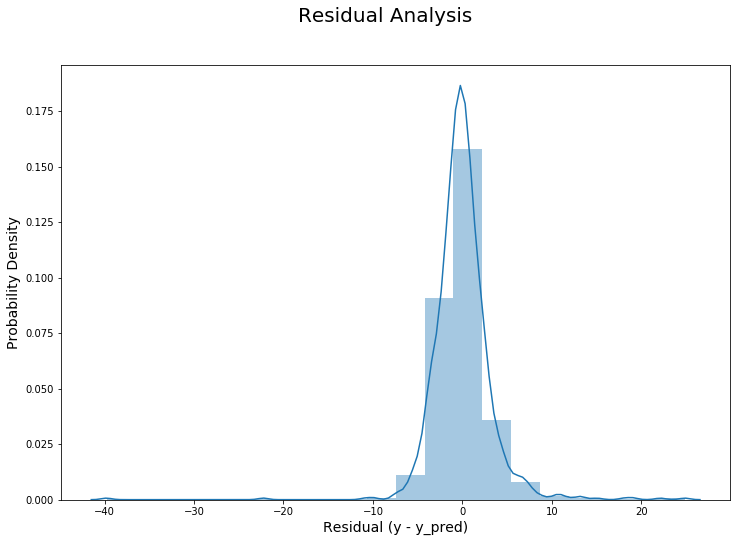

In [354]:
### Considering the Ridge Regression model as our final model
residuals = y_train - y_train_pred_ridge
## Scaling the residuals to obtain a neat plot
residuals = residuals/10000.0
fig = plt.figure(figsize=(12,8))
sns.distplot(residuals, bins = 20)
fig.suptitle('Residual Analysis', fontsize = 20)                  # Plot heading 
plt.xlabel('Residual (y - y_pred)', fontsize = 14)   
plt.ylabel('Probability Density' , fontsize = 14)

#### Observation : The error terms (residuals) are normally distributed

Text(0, 0.5, 'Residual')

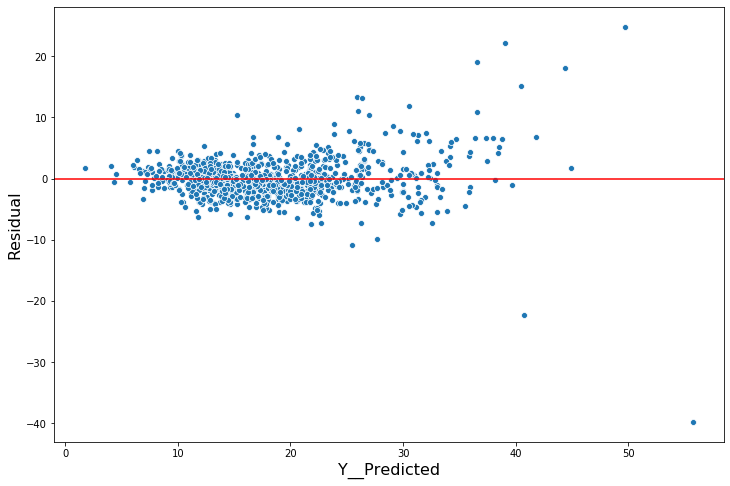

In [355]:
### Check if the residuals have constant variance
fig = plt.figure(figsize=(12, 8))
scaled_y_pred = y_train_pred_ridge/10000.0
sns.scatterplot(x=scaled_y_pred , y = residuals)
plt.axhline(y=0 , c='r')
plt.xlabel('Y__Predicted', fontsize = 16)
plt.ylabel('Residual' , fontsize = 16)

#### Observation : The error have a near constant variance (except for the very high values of Y)

## Step 7: Reporting the results of Linear Regression , Ridge and Lasso

In [356]:
lr_table = {'Metric' : ['R-squared (Train)' , 'R-squared (Test)' , 'RMSE (Train)' , 'RMSE (Test)']}

In [357]:
regression_metric = pd.DataFrame(lr_table)

In [358]:
lr_metric = pd.Series(metric1 , name = 'Linear Regression')

In [359]:
ridge_metric = pd.Series(metric2 , name = 'Ridge')

In [360]:
lasso_metric = pd.Series(metric3 , name = 'Lasso')

In [361]:
final_metric = pd.concat([regression_metric , lr_metric , ridge_metric, lasso_metric] , axis = 1)

In [362]:
final_metric

,Metric,Linear Regression,Ridge,Lasso
0,R-squared (Train),0.891507,0.821619,0.828578
1,R-squared (Test),0.507596,0.817394,0.806990
2,RMSE (Train),26069.231074,33427.286628,32768.823603
3,RMSE (Test),55838.194035,34003.870066,34959.111933


### Coefficients obtained in Regression models

In [363]:
betas = pd.DataFrame(index = X_train_rfe.columns)

In [364]:
betas['Linear'] = lr_simple2_model.params
betas['Ridge']  = ridge.coef_
betas['Lasso'] = lasso.coef_

In [365]:
betas

,Linear,Ridge,Lasso
LotArea,209771.429095,68897.975531,80702.023688
OverallQual,93239.968857,139819.534972,145598.307922
OverallCond,21780.099069,17223.574999,14259.563572
MasVnrArea,30693.846983,43751.797706,36631.037321
TotalBsmtSF,218741.116623,76367.463627,0.000000
1stFlrSF,298410.794616,170942.938001,282536.404941
2ndFlrSF,150725.334980,82569.505509,94658.306607
BedroomAbvGr,-82619.251884,-5770.004599,-19116.726429
KitchenAbvGr,-90092.296064,-37675.424665,-44644.782710
MSZoning_FV,47855.137967,18411.312893,11360.369740


In [366]:
### Find the absolute values of the betas (consider only the magnitude , not the sign)
absolute_betas = abs(betas)

In [367]:
absolute_betas

,Linear,Ridge,Lasso
LotArea,209771.429095,68897.975531,80702.023688
OverallQual,93239.968857,139819.534972,145598.307922
OverallCond,21780.099069,17223.574999,14259.563572
MasVnrArea,30693.846983,43751.797706,36631.037321
TotalBsmtSF,218741.116623,76367.463627,0.000000
1stFlrSF,298410.794616,170942.938001,282536.404941
2ndFlrSF,150725.334980,82569.505509,94658.306607
BedroomAbvGr,82619.251884,5770.004599,19116.726429
KitchenAbvGr,90092.296064,37675.424665,44644.782710
MSZoning_FV,47855.137967,18411.312893,11360.369740


### Find the most significant predictor variables in both Ridge and Lasso

In [368]:
absolute_betas.sort_values(by='Ridge' , ascending=False)['Ridge'].head(8)

1stFlrSF            170942.938001
OverallQual         139819.534972
Condition2_PosN     111336.477591
2ndFlrSF             82569.505509
TotalBsmtSF          76367.463627
LotArea              68897.975531
RoofMatl_WdShngl     65884.719275
KitchenQual_Fa       46426.011323
Name: Ridge, dtype: float64

In [369]:
absolute_betas.sort_values(by='Lasso' , ascending=False)['Lasso'].head(8)

1stFlrSF            282536.404941
Condition2_PosN     257272.517801
OverallQual         145598.307922
2ndFlrSF             94658.306607
LotArea              80702.023688
RoofMatl_WdShngl     55227.984594
KitchenAbvGr         44644.782710
KitchenQual_Fa       42943.121182
Name: Lasso, dtype: float64

Observation : If we take the common among the top 8 features for both Lasso and Ridge , we get the following list (in decreasing order of importance) :
- 1stFlrSF
- OverallQual
- Condition2_PosN
- 2ndFlrSF
- LotArea
- RoofMatl_WdShngl
- KitchenQual_Fa  *(-ve correlation)*

One important variable in Ridge i.e. *TotalBsmtSF* has been shrinked to ZERO in Lasso.

## Subjective Questions 

### Question 1

In [370]:
## Fitting a Ridge model for alpha = 4.0 
alpha  = 4.0
ridge = Ridge(alpha = alpha)
ridge.fit(X_train_rfe , y_train)

Ridge(alpha=4.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [371]:
y_pred_train_ridge = ridge.predict(X_train_rfe)
r2_score(y_train , y_pred_train_ridge)

0.8064265259136921

In [372]:
## Fitting a Ridge model for alpha = 200 
alpha  = 200
lasso = Lasso(alpha = alpha)
lasso.fit(X_train_rfe , y_train)

Lasso(alpha=200, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [373]:
y_pred_train_lasso = lasso.predict(X_train_rfe)
r2_score(y_train , y_pred_train_lasso)

0.8069749667415562

In [374]:
betas2 = pd.DataFrame(index = X_train_rfe.columns)
betas2['Ridge']  = ridge.coef_
betas2['Lasso'] = lasso.coef_
absolute_betas = abs(betas2)

In [375]:
absolute_betas.sort_values(by='Ridge' , ascending=False)['Ridge'].head(8)

OverallQual             137259.866151
1stFlrSF                134931.712519
2ndFlrSF                 71907.983077
TotalBsmtSF              70194.721064
Condition2_PosN          61625.862838
LotArea                  52358.050755
KitchenQual_TA           47218.215395
Neighborhood_NoRidge     46502.707805
Name: Ridge, dtype: float64

In [376]:
absolute_betas.sort_values(by='Lasso' , ascending=False)['Lasso'].head(8)

1stFlrSF                241160.718887
OverallQual             163494.369100
Condition2_PosN         120049.979938
2ndFlrSF                 77356.659130
LotArea                  58495.185012
KitchenQual_TA           42059.352909
KitchenQual_Fa           41617.814782
Neighborhood_NoRidge     40097.358666
Name: Lasso, dtype: float64

In [377]:
betas2

,Ridge,Lasso
LotArea,52358.050755,58495.185012
OverallQual,137259.866151,163494.369100
OverallCond,16441.720742,11836.834664
MasVnrArea,46265.696224,36349.558604
TotalBsmtSF,70194.721064,0.000000
1stFlrSF,134931.712519,241160.718887
2ndFlrSF,71907.983077,77356.659130
BedroomAbvGr,4923.449557,-0.000000
KitchenAbvGr,-26220.674162,-20111.949215
MSZoning_FV,13314.560784,3579.658903


### Question 2

In [378]:
### Original betas for the optimal value of alpha for Ridge and Lasso

In [379]:
betas

,Linear,Ridge,Lasso
LotArea,209771.429095,68897.975531,80702.023688
OverallQual,93239.968857,139819.534972,145598.307922
OverallCond,21780.099069,17223.574999,14259.563572
MasVnrArea,30693.846983,43751.797706,36631.037321
TotalBsmtSF,218741.116623,76367.463627,0.000000
1stFlrSF,298410.794616,170942.938001,282536.404941
2ndFlrSF,150725.334980,82569.505509,94658.306607
BedroomAbvGr,-82619.251884,-5770.004599,-19116.726429
KitchenAbvGr,-90092.296064,-37675.424665,-44644.782710
MSZoning_FV,47855.137967,18411.312893,11360.369740


In [380]:
lasso_zero_ceoef = betas[betas.Lasso == 0]

In [381]:
lasso_zero_ceoef

,Linear,Ridge,Lasso
TotalBsmtSF,218741.116623,76367.463627,0.0
MSZoning_RH,35946.261900,9207.513089,0.0
Utilities_NoSeWa,-32061.741679,-14711.663451,-0.0
RoofStyle_Shed,121547.261944,15322.840102,0.0
RoofMatl_Metal,799057.243122,21251.352552,0.0
RoofMatl_Roll,661185.410733,961.439060,0.0
RoofMatl_WdShake,665820.288826,25715.538117,0.0
Exterior1st_ImStucc,-37171.686985,-13471.253767,-0.0
Exterior2nd_CBlock,-31279.405086,-6725.051168,-0.0
Exterior2nd_Other,61485.238534,22657.897075,0.0


In [382]:
print(final_metric)

              Metric  Linear Regression         Ridge         Lasso
0  R-squared (Train)           0.891507      0.821619      0.828578
1   R-squared (Test)           0.507596      0.817394      0.806990
2       RMSE (Train)       26069.231074  33427.286628  32768.823603
3        RMSE (Test)       55838.194035  34003.870066  34959.111933


### Question 3

In [383]:
absolute_betas = abs(betas)
top5 = absolute_betas.sort_values(by='Lasso' , ascending=False)['Lasso'].head(5)

In [384]:
list(top5.index)

['1stFlrSF', 'Condition2_PosN', 'OverallQual', '2ndFlrSF', 'LotArea']

In [385]:
X_train_rfe_dropped = X_train_rfe.drop(columns=list(top5.index),axis=1)

In [386]:
X_train_rfe_dropped

,OverallCond,MasVnrArea,TotalBsmtSF,BedroomAbvGr,KitchenAbvGr,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Utilities_NoSeWa,LandSlope_Sev,Neighborhood_NoRidge,Neighborhood_Veenker,RoofStyle_Shed,RoofMatl_CompShg,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_ImStucc,Exterior2nd_CBlock,Exterior2nd_ImStucc,Exterior2nd_Other,MasVnrType_Stone,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,Foundation_Slab,Heating_Grav,Heating_OthW,Heating_Wall,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Min1,Functional_Min2,Functional_Typ,SaleCondition_Alloca
801,0.714286,0.000000,0.195745,0.250,0.333333,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0
569,0.428571,0.000000,0.154337,0.250,0.333333,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0
1181,0.428571,0.116250,0.261866,0.250,0.333333,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0
808,0.428571,0.654375,0.167594,0.375,0.333333,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0
1095,0.428571,0.000000,0.215057,0.375,0.333333,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
805,0.428571,0.160000,0.231915,0.375,0.333333,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0
53,0.428571,0.000000,0.301473,0.000,0.333333,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0
351,0.428571,0.000000,0.237807,0.250,0.333333,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0
79,0.571429,0.000000,0.072013,0.250,0.333333,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0


In [387]:
## Fitting a Ridge model for alpha = 100 
alpha  = 100
lasso = Lasso(alpha = alpha)
lasso.fit(X_train_rfe_dropped , y_train)

Lasso(alpha=100, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [388]:
betas_new = pd.DataFrame(index=X_train_rfe_dropped.columns)

In [389]:
betas_new['Lasso_new'] = lasso.coef_

In [390]:
betas_new

,Lasso_new
OverallCond,18558.004886
MasVnrArea,90181.193013
TotalBsmtSF,222000.573116
BedroomAbvGr,108390.188171
KitchenAbvGr,-38101.712300
MSZoning_FV,22212.143223
MSZoning_RH,0.000000
MSZoning_RL,21582.613422
MSZoning_RM,-0.000000
Utilities_NoSeWa,-0.000000


In [391]:
abs_betas = abs(betas_new)
top5_new = abs_betas.sort_values(by='Lasso_new' , ascending=False)['Lasso_new'].head(5)

In [392]:
top5_new

TotalBsmtSF       222000.573116
BedroomAbvGr      108390.188171
MasVnrArea         90181.193013
KitchenQual_Fa     85918.643755
KitchenQual_TA     78856.982076
Name: Lasso_new, dtype: float64

### End of File